In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")
from geopy.geocoders import ArcGIS
import folium

In [2]:
def read_data(data_list):
    web_path ='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    alldata = []
    for i in data_list:
        alldata.append(web_path + i + ".txt")
    df_list = [pd.read_csv(file) for file in alldata]
    df = pd.concat(df_list)
    df.columns = df.columns.str.strip()
    return df

In [3]:
df_2022 = read_data(['220305', '220312', '220319', '220326',
                     '220402', '220409', '220416', '220423', '220430',
                     '220507', '220514', '220521', '220528', '220604'])

In [4]:
df_2022["TURNSTILE"] = df_2022["C/A"] + "-" + df_2022["UNIT"] + "-" + df_2022["SCP"]
df_2022.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00


In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951396 entries, 0 to 211608
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   C/A        object
 1   UNIT       object
 2   SCP        object
 3   STATION    object
 4   LINENAME   object
 5   DIVISION   object
 6   DATE       object
 7   TIME       object
 8   DESC       object
 9   ENTRIES    int64 
 10  EXITS      int64 
 11  TURNSTILE  object
dtypes: int64(2), object(10)
memory usage: 292.7+ MB


In [6]:
df_2022.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
TURNSTILE    0
dtype: int64

In [7]:
#Is there any repeated data in the dataframe ?
(df_2022.groupby(['TURNSTILE', 'STATION', 'DATE', 'TIME'])['ENTRIES','EXITS']
 .count()
 .reset_index()
 .sort_values(['ENTRIES','EXITS'],ascending=False)).head()

,TURNSTILE,STATION,DATE,TIME,ENTRIES,EXITS
158533,A060-R001-00-00-05,WHITEHALL S-FRY,05/09/2022,05:00:00,2,2
773837,N063A-R011-00-00-00,42 ST-PORT AUTH,04/07/2022,12:00:00,2,2
774421,N063A-R011-00-00-01,42 ST-PORT AUTH,04/07/2022,12:00:00,2,2
2364942,R249-R179-01-05-01,86 ST,04/16/2022,00:00:00,2,2
2364943,R249-R179-01-05-01,86 ST,04/16/2022,04:00:00,2,2


In [8]:
#Repeated data are dropped.
df_2022 = df_2022.drop_duplicates(subset=['TURNSTILE','STATION','DATE','TIME'])

In [9]:
#Lets check data
(df_2022.groupby(['TURNSTILE', 'STATION', 'DATE', 'TIME'])['ENTRIES','EXITS']
 .count()
 .reset_index()
 .sort_values(['ENTRIES','EXITS'],ascending=False)).head()

,TURNSTILE,STATION,DATE,TIME,ENTRIES,EXITS
0,A002-R051-02-00-00,59 ST,02/26/2022,03:00:00,1,1
1,A002-R051-02-00-00,59 ST,02/26/2022,07:00:00,1,1
2,A002-R051-02-00-00,59 ST,02/26/2022,11:00:00,1,1
3,A002-R051-02-00-00,59 ST,02/26/2022,15:00:00,1,1
4,A002-R051-02-00-00,59 ST,02/26/2022,19:00:00,1,1


In [10]:
df_2022['DATETIME'] = df_2022["DATE"]+ " " + df_2022["TIME"]
df_2022['DATETIME'] = pd.to_datetime(df_2022['DATETIME'], format='%m/%d/%Y %H:%M:%S')
df_2022.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00


In [11]:
df=df_2022.sort_values(["TURNSTILE","DATETIME"])
df.reset_index(drop=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 05:00:00
2951335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 09:00:00
2951336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 13:00:00
2951337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435,TRAM2-R469-00-05-01,2022-06-03 17:00:00


In [12]:
group=df.groupby(["TURNSTILE"])
df["ENTRIES_COUNT"]=group["ENTRIES"].transform(pd.Series.diff)
df["EXIT_COUNT"]=group["EXITS"].transform(pd.Series.diff)
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,A002-R051-02-00-00,2022-02-26 23:00:00,32.0,38.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,03:00:00,REGULAR,7689903,2671580,A002-R051-02-00-00,2022-02-27 03:00:00,13.0,12.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,07:00:00,REGULAR,7689908,2671583,A002-R051-02-00-00,2022-02-27 07:00:00,5.0,3.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,11:00:00,REGULAR,7689924,2671637,A002-R051-02-00-00,2022-02-27 11:00:00,16.0,54.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,15:00:00,REGULAR,7689970,2671692,A002-R051-02-00-00,2022-02-27 15:00:00,46.0,55.0


In [13]:
#Zero values are assigned instead of NaN values.
df.fillna(0,inplace=True)

In [14]:
#Is there any negative 'ENTRIES_COUNT' or 'EXIT_COUNT' ? 
df[(df['ENTRIES_COUNT']<0) | (df['EXIT_COUNT']<0)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT
1134,A010,R080,00-00-01,57 ST-7 AV,NQRW,BMT,05/07/2022,12:00:00,REGULAR,18,31,A010-R080-00-00-01,2022-05-07 12:00:00,-15855075.0,-6428264.0
1173,A010,R080,00-00-02,57 ST-7 AV,NQRW,BMT,05/07/2022,12:00:00,REGULAR,19,23,A010-R080-00-00-02,2022-05-07 12:00:00,-11599238.0,-4756984.0
1212,A010,R080,00-00-03,57 ST-7 AV,NQRW,BMT,05/07/2022,12:00:00,REGULAR,24,23,A010-R080-00-00-03,2022-05-07 12:00:00,-3985271.0,-2006172.0
1513,A011,R080,01-00-01,57 ST-7 AV,NQRW,BMT,04/29/2022,08:00:00,REGULAR,32,82,A011-R080-01-00-01,2022-04-29 08:00:00,-836693.0,-1408520.0
1652,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,02/26/2022,07:00:00,REGULAR,885517307,489281631,A011-R080-01-03-00,2022-02-26 07:00:00,-10.0,-36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209853,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/03/2022,09:00:00,REGULAR,1559756611,1728282711,R730-R431-00-00-04,2022-06-03 09:00:00,-135.0,28.0
209854,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/03/2022,13:00:00,REGULAR,1559756587,1728282722,R730-R431-00-00-04,2022-06-03 13:00:00,-24.0,11.0
209855,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/03/2022,17:00:00,REGULAR,1559756550,1728282768,R730-R431-00-00-04,2022-06-03 17:00:00,-37.0,46.0
209856,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/03/2022,21:00:00,REGULAR,1559756524,1728282823,R730-R431-00-00-04,2022-06-03 21:00:00,-26.0,55.0


In [15]:
df[(df['ENTRIES_COUNT']<0) | (df['EXIT_COUNT']<0)]["ENTRIES_COUNT"]

1134     -15855075.0
1173     -11599238.0
1212      -3985271.0
1513       -836693.0
1652           -10.0
             ...    
209853        -135.0
209854         -24.0
209855         -37.0
209856         -26.0
208268    -1089712.0
Name: ENTRIES_COUNT, Length: 35608, dtype: float64

In [16]:
#The new dataframe is created by taking only positive 'ENTRIES_COUNT' and 'EXIT_COUNT'
df_2022_positive = df[(df['ENTRIES_COUNT']>0) & (df['EXIT_COUNT']>0)]
df_2022_positive.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,A002-R051-02-00-00,2022-02-26 23:00:00,32.0,38.0


In [17]:
#Lets check whether there is a negative value in df_2022_positive or not
df_2022_positive[(df_2022_positive['ENTRIES_COUNT']<0) | (df_2022_positive['EXIT_COUNT']<0)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT


In [18]:
df_2022_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350281 entries, 1 to 211524
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   C/A            object        
 1   UNIT           object        
 2   SCP            object        
 3   STATION        object        
 4   LINENAME       object        
 5   DIVISION       object        
 6   DATE           object        
 7   TIME           object        
 8   DESC           object        
 9   ENTRIES        int64         
 10  EXITS          int64         
 11  TURNSTILE      object        
 12  DATETIME       datetime64[ns]
 13  ENTRIES_COUNT  float64       
 14  EXIT_COUNT     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 286.9+ MB


In [19]:
df_2022_positive.describe()

,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT
count,2.350281e+06,2.350281e+06,2.350281e+06,2.350281e+06
mean,2.953804e+07,2.308529e+07,1.842908e+03,2.369685e+03
std,1.728122e+08,1.495207e+08,1.241887e+06,1.634907e+06
min,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
25%,3.925900e+05,2.814330e+05,1.400000e+01,1.900000e+01
50%,1.933509e+06,1.282980e+06,4.700000e+01,5.600000e+01
75%,6.532258e+06,4.552448e+06,1.170000e+02,1.400000e+02
max,2.116209e+09,2.064368e+09,1.041557e+09,1.871701e+09


In [20]:
# There are some outliers in the dataframe. Some limits should be set to analyze data efficiently.
df_2022_positive['ENTRIES_COUNT'][df_2022_positive['ENTRIES_COUNT'] >= 4800] = 0 
df_2022_positive['EXIT_COUNT'][df_2022_positive['EXIT_COUNT'] >= 4800] = 0

In [21]:
df_2022_positive.describe()

,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT
count,2.350281e+06,2.350281e+06,2.350281e+06,2.350281e+06
mean,2.953804e+07,2.308529e+07,8.588779e+01,1.099859e+02
std,1.728122e+08,1.495207e+08,1.071193e+02,1.504995e+02
min,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,3.925900e+05,2.814330e+05,1.400000e+01,1.900000e+01
50%,1.933509e+06,1.282980e+06,4.700000e+01,5.600000e+01
75%,6.532258e+06,4.552448e+06,1.170000e+02,1.400000e+02
max,2.116209e+09,2.064368e+09,4.498000e+03,4.428000e+03


In [22]:
indexzero = df_2022_positive[(df_2022_positive.ENTRIES_COUNT == 0) | (df_2022_positive.EXIT_COUNT == 0)].index
df_2022_positive.drop(indexzero , inplace=True)

In [23]:
df_2022_positive.describe()

,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT
count,2.349538e+06,2.349538e+06,2.349538e+06,2.349538e+06
mean,2.954170e+07,2.308805e+07,8.588511e+01,1.099876e+02
std,1.728239e+08,1.495275e+08,1.070550e+02,1.504695e+02
min,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
25%,3.929762e+05,2.816638e+05,1.400000e+01,1.900000e+01
50%,1.935648e+06,1.283978e+06,4.700000e+01,5.600000e+01
75%,6.533797e+06,4.554449e+06,1.170000e+02,1.400000e+02
max,2.116209e+09,2.039322e+09,4.498000e+03,4.428000e+03


In [24]:
#Total people is determined by adding 'ENTRIES_COUNT' and 'EXIT_COUNT'
df_2022_positive['TOTAL_PEOPLE'] = df_2022_positive['ENTRIES_COUNT'] + df_2022_positive['EXIT_COUNT']

In [25]:
df_2022_ten_busiest_stations = (df_2022_positive.groupby(['STATION'])['TOTAL_PEOPLE'].sum().reset_index().sort_values(['TOTAL_PEOPLE'], ascending=False)).head(10)
df_2022_ten_busiest_stations

,STATION,TOTAL_PEOPLE
61,34 ST-PENN STA,12378445.0
233,GRD CNTRL-42 ST,9979649.0
59,34 ST-HERALD SQ,9123556.0
14,14 ST-UNION SQ,8136532.0
110,86 ST,8063666.0
46,23 ST,7893019.0
353,TIMES SQ-42 ST,7760488.0
68,42 ST-PORT AUTH,7296323.0
226,FULTON ST,6916644.0
9,125 ST,6860456.0


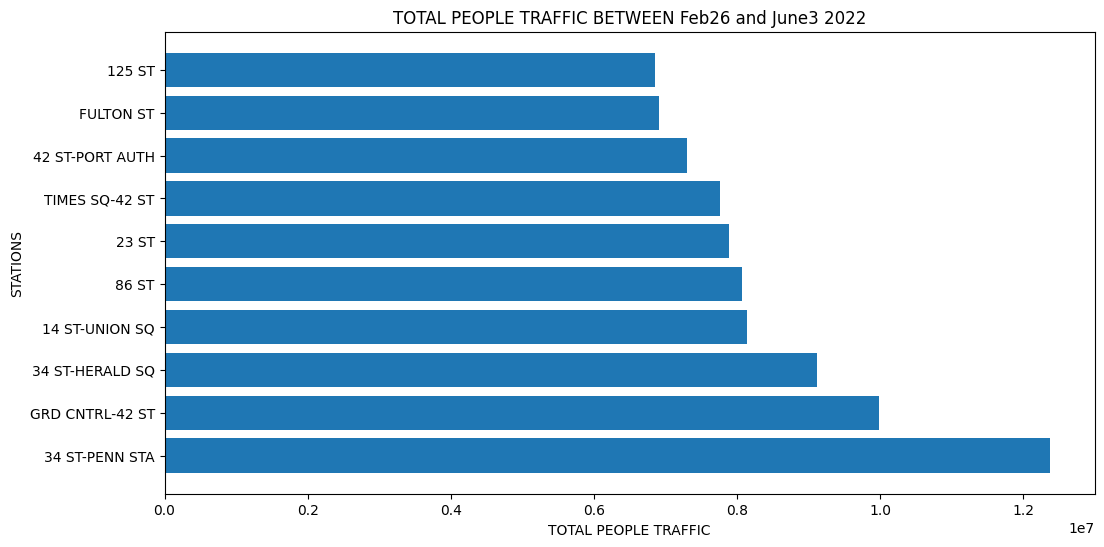

In [26]:
plt.figure(figsize = [12,6])
stations = df_2022_ten_busiest_stations.STATION
total_people = df_2022_ten_busiest_stations.TOTAL_PEOPLE
plt.barh(stations, total_people, align='center')
plt.xlabel('TOTAL PEOPLE TRAFFIC')
plt.ylabel('STATIONS')
plt.title('TOTAL PEOPLE TRAFFIC BETWEEN Feb26 and June3 2022')
plt.show()

In [27]:
station_list = [i for i in df_2022_ten_busiest_stations['STATION']]
station_list

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '14 ST-UNION SQ',
 '86 ST',
 '23 ST',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH',
 'FULTON ST',
 '125 ST']

In [28]:
#The ten busiest stations are considered and names of days are determined and added into the dataframe.
top_ten_stations=df_2022_positive[df_2022_positive["STATION"].isin(station_list)]
top_ten_stations["NAMEOFDAY"]= top_ten_stations["DATETIME"].dt.day_name()
top_ten_stations.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE,NAMEOFDAY
3003,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,07:00:00,REGULAR,10274908,13100825,A021-R032-01-00-00,2022-02-26 07:00:00,15.0,43.0,58.0,Saturday
3004,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,11:00:00,REGULAR,10274980,13101182,A021-R032-01-00-00,2022-02-26 11:00:00,72.0,357.0,429.0,Saturday
3005,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,15:00:00,REGULAR,10275091,13101724,A021-R032-01-00-00,2022-02-26 15:00:00,111.0,542.0,653.0,Saturday
3006,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,19:00:00,REGULAR,10275296,13102262,A021-R032-01-00-00,2022-02-26 19:00:00,205.0,538.0,743.0,Saturday
3007,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,23:00:00,REGULAR,10275430,13102505,A021-R032-01-00-00,2022-02-26 23:00:00,134.0,243.0,377.0,Saturday


In [29]:
#Total people traffic are calculated per day each station. 
top_ten_stations_weekdays = (top_ten_stations.groupby(['STATION','NAMEOFDAY']).sum().reset_index())
top_ten_stations_weekdays['TOTAL_PEOPLE'] = top_ten_stations_weekdays.ENTRIES_COUNT + top_ten_stations_weekdays.EXIT_COUNT
top_ten_stations_weekdays.head(8)

,STATION,NAMEOFDAY,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
0,125 ST,Friday,585373597769,543266188826,468013.0,642162.0,1110175.0
1,125 ST,Monday,601753906242,557987815901,432509.0,589704.0,1022213.0
2,125 ST,Saturday,586495110590,542923151721,276992.0,444150.0,721142.0
3,125 ST,Sunday,591335644995,547476012095,234454.0,385838.0,620292.0
4,125 ST,Thursday,591787439959,548547292677,480296.0,647062.0,1127358.0
5,125 ST,Tuesday,592786305956,549065244414,478392.0,640791.0,1119183.0
6,125 ST,Wednesday,590974970245,547738821031,483577.0,656516.0,1140093.0
7,14 ST-UNION SQ,Friday,21288415698,15851400434,489365.0,816090.0,1305455.0


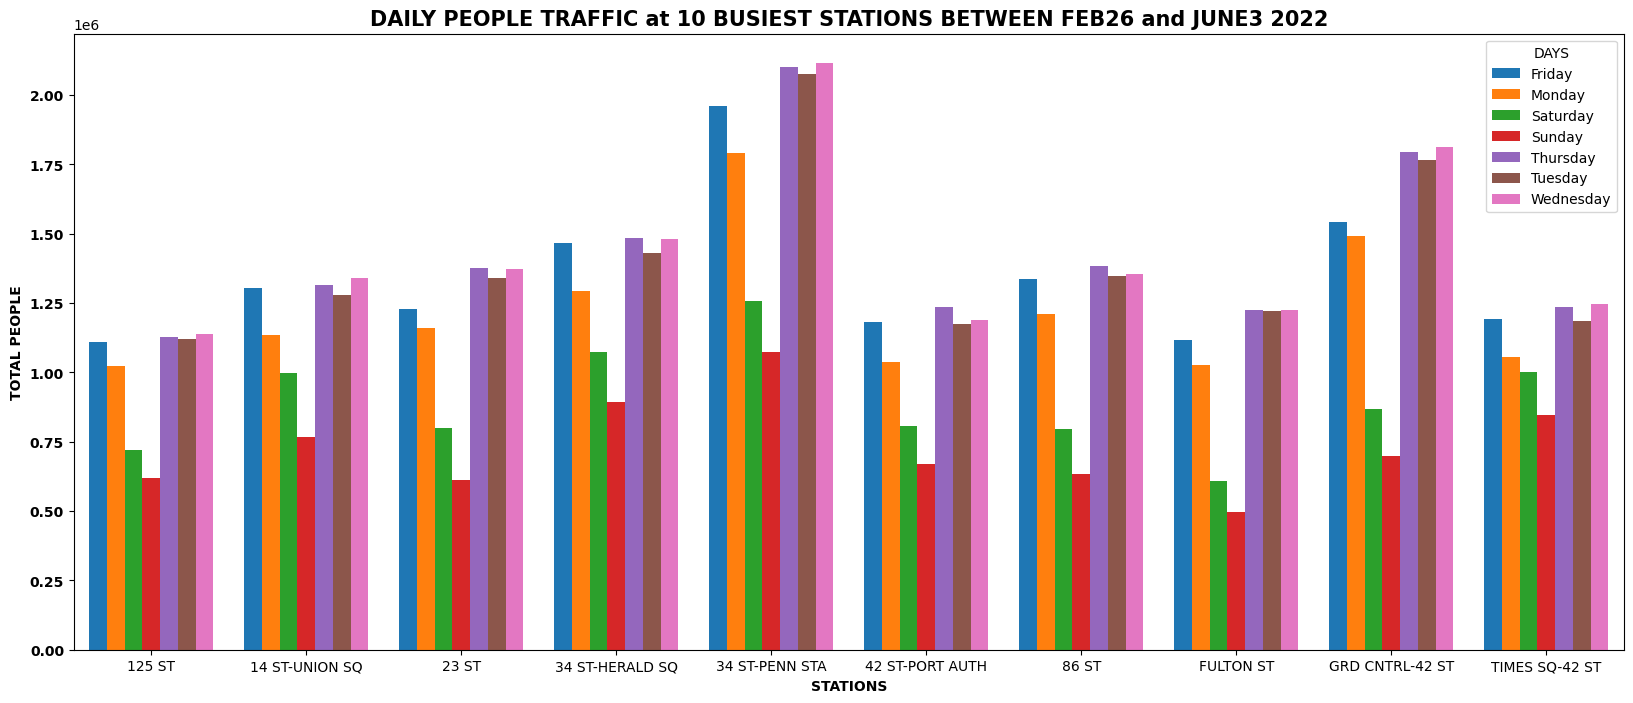

In [30]:
plt.figure(figsize=(20,8),dpi=100),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TOTAL_PEOPLE", hue="NAMEOFDAY",data=top_ten_stations_weekdays, saturation=1)
plt.title("DAILY PEOPLE TRAFFIC at 10 BUSIEST STATIONS BETWEEN FEB26 and JUNE3 2022", weight="bold", fontsize=15)
plt.xlabel("STATIONS",weight="bold")
plt.xticks(rotation=0)
plt.ylabel("TOTAL PEOPLE",weight= "bold")
plt.yticks(weight="bold")
plt.legend(title="DAYS")
plt.show()

In [31]:
from geopy.geocoders import Nominatim 
import folium 

In [32]:
from geopy.geocoders import ArcGIS

In [33]:
station_list

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '14 ST-UNION SQ',
 '86 ST',
 '23 ST',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH',
 'FULTON ST',
 '125 ST']

## Analysis in Weekends & Weekdays  

In [35]:
df_2022_positive.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0,25.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0,119.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0,118.0


In [36]:
# "df2022w" is created not to change main data "df_2022_positive".
df2022w = df_2022_positive.copy()
df2022w['NAME_OF_DAY'] = df2022w["DATETIME"].dt.day_name()
df2022w.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE,NAME_OF_DAY
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0,25.0,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0,119.0,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0,118.0,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0,132.0,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,A002-R051-02-00-00,2022-02-26 23:00:00,32.0,38.0,70.0,Saturday


### Weekends 

In [37]:
# df2022we is created to observe only weekends.
df2022we = df2022w[(df2022w['NAME_OF_DAY'] == 'Saturday') | (df2022w['NAME_OF_DAY'] == 'Sunday')]

In [38]:
#Lets check weekends
df2022we.NAME_OF_DAY.value_counts()

Saturday    322432
Sunday      318191
Name: NAME_OF_DAY, dtype: int64

In [39]:
df2022we.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE,NAME_OF_DAY
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0,25.0,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0,119.0,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0,118.0,Saturday


In [40]:
# The ten busiest stations are determined at weekends.
df2022we['TOTAL_PEOPLE'] = df2022we.ENTRIES_COUNT + df2022we.EXIT_COUNT
df2022we_ten_busiest_stations = (df2022we.groupby(['STATION'])['TOTAL_PEOPLE'].sum().reset_index().sort_values(['TOTAL_PEOPLE'], ascending=False)).head(10)
df2022we_ten_busiest_stations.reset_index(drop=True, inplace=True)
df2022we_ten_busiest_stations

,STATION,TOTAL_PEOPLE
0,34 ST-PENN STA,2333606.0
1,34 ST-HERALD SQ,1965411.0
2,TIMES SQ-42 ST,1848789.0
3,14 ST-UNION SQ,1762732.0
4,GRD CNTRL-42 ST,1568017.0
5,42 ST-PORT AUTH,1479614.0
6,86 ST,1431956.0
7,23 ST,1411507.0
8,125 ST,1341434.0
9,CANAL ST,1207729.0


### Weekdays

In [41]:
# df2022wd is created to observe only weekdays.
df2022wd = df2022w[(df2022w['NAME_OF_DAY'] == 'Monday') | (df2022w['NAME_OF_DAY'] == 'Tuesday') 
                   | (df2022w['NAME_OF_DAY'] == 'Wednesday')
                   | (df2022w['NAME_OF_DAY'] == 'Thursday')
                   | (df2022w['NAME_OF_DAY'] == 'Friday')]

In [42]:
#Lets check weekdays
df2022wd.NAME_OF_DAY.value_counts()

Wednesday    343589
Friday       343510
Thursday     343171
Tuesday      342228
Monday       336417
Name: NAME_OF_DAY, dtype: int64

In [43]:
# The ten busiest stations are determined in weekdays.
df2022wd['TOTAL_PEOPLE'] = df2022wd.ENTRIES_COUNT + df2022wd.EXIT_COUNT
df2022wd_ten_busiest_stations = (df2022wd.groupby(['STATION'])['TOTAL_PEOPLE'].sum().reset_index().sort_values(['TOTAL_PEOPLE'], ascending=False)).head(10)
df2022wd_ten_busiest_stations.reset_index(drop=True, inplace=True)
df2022wd_ten_busiest_stations

,STATION,TOTAL_PEOPLE
0,34 ST-PENN STA,10044839.0
1,GRD CNTRL-42 ST,8411632.0
2,34 ST-HERALD SQ,7158145.0
3,86 ST,6631710.0
4,23 ST,6481512.0
5,14 ST-UNION SQ,6373800.0
6,TIMES SQ-42 ST,5911699.0
7,42 ST-PORT AUTH,5816709.0
8,FULTON ST,5813303.0
9,125 ST,5519022.0


## Time Interval Analysis

### Weekdays Hourly Analysis

In [44]:
df2022wd.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE,NAME_OF_DAY
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2022,03:00:00,REGULAR,7690057,2671766,A002-R051-02-00-00,2022-02-28 03:00:00,11.0,3.0,14.0,Monday
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2022,07:00:00,REGULAR,7690058,2671821,A002-R051-02-00-00,2022-02-28 07:00:00,1.0,55.0,56.0,Monday


In [45]:
conditions = [(df2022wd['TIME'] >= '00:00:00') & (df2022wd['TIME'] < '04:00:00'),
(df2022wd['TIME']>='04:00:00') & (df2022wd['TIME']<'08:00:00'),
(df2022wd['TIME']>='08:00:00') & (df2022wd['TIME']<='12:00:00'),
(df2022wd['TIME']>='12:00:00') & (df2022wd['TIME']<='16:00:00'),
(df2022wd['TIME']>='16:00:00') & (df2022wd['TIME']<='20:00:00'),
(df2022wd['TIME']>='20:00:00') & (df2022wd['TIME']<='23:59:59')]
values=['0-4','4-8','8-12','12-16','16-20','20-24']
df2022wd['INTERVAL']=np.select(conditions,values)

In [46]:
df2022wd.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE,NAME_OF_DAY,INTERVAL
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2022,03:00:00,REGULAR,7690057,2671766,A002-R051-02-00-00,2022-02-28 03:00:00,11.0,3.0,14.0,Monday,0-4
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2022,07:00:00,REGULAR,7690058,2671821,A002-R051-02-00-00,2022-02-28 07:00:00,1.0,55.0,56.0,Monday,4-8
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2022,11:00:00,REGULAR,7690091,2672117,A002-R051-02-00-00,2022-02-28 11:00:00,33.0,296.0,329.0,Monday,8-12


In [47]:
df2022wd_groupby_station_interval = (df2022wd.groupby(['STATION','INTERVAL']).sum().reset_index())
df2022wd_groupby_station_interval.head(7)

,STATION,INTERVAL,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
0,1 AV,0-4,30140161845,29454335968,58348.0,139172.0,197520.0
1,1 AV,12-16,33102570379,32422385068,158308.0,216570.0,374878.0
2,1 AV,16-20,32649774279,31972340613,205777.0,335074.0,540851.0
3,1 AV,20-24,4601232142,4501668956,12982.0,31372.0,44354.0
4,1 AV,4-8,26334236685,25729747048,9842.0,26436.0,36278.0
5,1 AV,8-12,59774703743,58542243711,146808.0,458611.0,605419.0
6,103 ST,0-4,9641740614,8606496402,45717.0,120678.0,166395.0


In [48]:
station_list_df2022wd = [i for i in df2022wd_ten_busiest_stations['STATION']]
station_list_df2022wd

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '86 ST',
 '23 ST',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH',
 'FULTON ST',
 '125 ST']

In [49]:
df2022wd_timeinterval=df2022wd_groupby_station_interval[df2022wd_groupby_station_interval["STATION"].isin(station_list_df2022wd)]
df2022wd_timeinterval.head(8)

,STATION,INTERVAL,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
54,125 ST,0-4,486750585683,450542598495,156100.0,299306.0,455406.0
55,125 ST,12-16,494704612073,457962223545,491118.0,645271.0,1136389.0
56,125 ST,16-20,494735521080,457986476770,708359.0,854514.0,1562873.0
57,125 ST,20-24,417036247922,385975511958,256953.0,296537.0,553490.0
58,125 ST,4-8,480580471978,447503503695,35829.0,87329.0,123158.0
59,125 ST,8-12,588868781435,546635048386,694428.0,993278.0,1687706.0
84,14 ST-UNION SQ,0-4,17654935023,13117477932,260476.0,191772.0,452248.0
85,14 ST-UNION SQ,12-16,17896507576,13416703837,375692.0,1018514.0,1394206.0


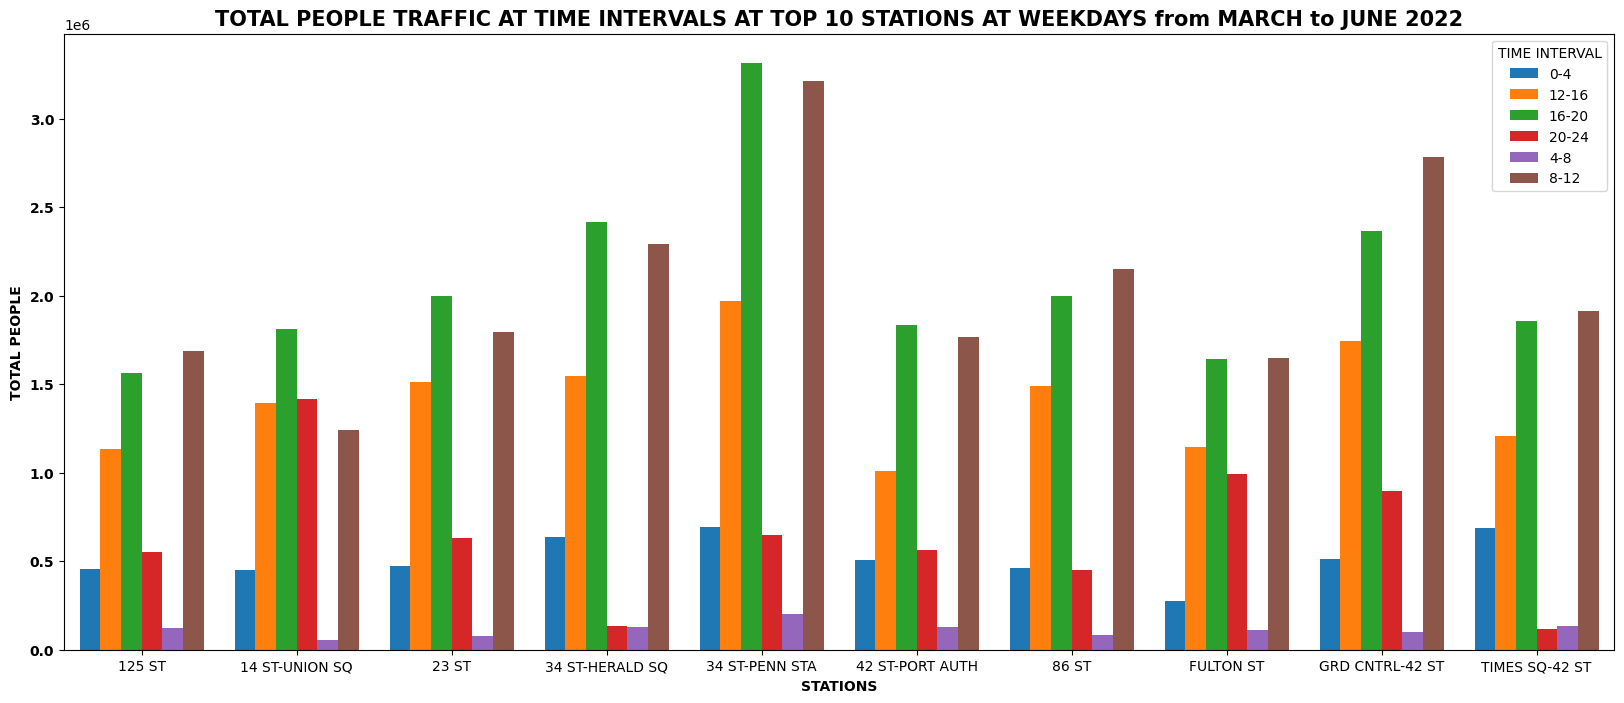

In [50]:
plt.figure(figsize=(20,8),dpi=100),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TOTAL_PEOPLE", hue="INTERVAL",data=df2022wd_timeinterval, saturation=1)
plt.title("TOTAL PEOPLE TRAFFIC AT TIME INTERVALS AT TOP 10 STATIONS AT WEEKDAYS from MARCH to JUNE 2022", weight="bold", fontsize=15)
plt.xlabel("STATIONS",weight="bold")
plt.xticks(rotation=0)
plt.ylabel("TOTAL PEOPLE",weight= "bold")
plt.yticks(weight="bold")
plt.legend(title="TIME INTERVAL")
plt.show()

In [51]:
station_for_map_wd=["34 Street Penn Station, New York","Grand Central - 42 St, New York","34 St - Herald Sq, New York",
                    "86th St 300-398 East 86th St, New York","23rd Street, New York","14 St - Union Sq, New York",
                    "Times Sq - 42 St, New York","Port Authorities West 42nd Street, New York",
                    "Fulton Street Subway Station Fulton Street between Broadway & Nassau St, New York",
                    "125 Street Station, New York"]

In [52]:
lat=[]
lon=[]
for i in station_for_map_wd:
    g=nom.geocode(i)
    if g is None:
        print('{} could not be geocoded'.format(i))
    else:
        lat.append(g.latitude)
        lon.append(g.longitude)
cities = {
        'stat': station_for_map_wd,
        'lon': lon,
        'lat': lat
        }
locations_wd= pd.DataFrame(cities, columns = ['stat', 'lon', 'lat'])

In [53]:
locations_wd

,stat,lon,lat
0,"34 Street Penn Station, New York",-73.960807,40.700547
1,"Grand Central - 42 St, New York",-73.977930,40.752290
2,"34 St - Herald Sq, New York",-73.987552,40.749999
3,"86th St 300-398 East 86th St, New York",-73.949473,40.776857
4,"23rd Street, New York",-73.914503,40.780828
5,"14 St - Union Sq, New York",-73.416750,42.903645
6,"Times Sq - 42 St, New York",-73.986414,40.755483
7,"Port Authorities West 42nd Street, New York",-73.987345,40.756204
8,Fulton Street Subway Station Fulton Street bet...,-74.010690,40.707140
9,"125 Street Station, New York",-74.110896,42.694248


In [54]:
locations_wd.iloc[0, locations_wd.columns.get_loc('lon')] = -73.99333604054702
locations_wd.iloc[0, locations_wd.columns.get_loc('lat')] = 40.75254353595325
locations_wd.iloc[1, locations_wd.columns.get_loc('lon')] = -73.97746544469129
locations_wd.iloc[1, locations_wd.columns.get_loc('lat')] = 40.75261507396132
locations_wd.iloc[2, locations_wd.columns.get_loc('lon')] = -73.98818064653828
locations_wd.iloc[2, locations_wd.columns.get_loc('lat')] = 40.750265690241726
locations_wd.iloc[3, locations_wd.columns.get_loc('lon')] =  -73.95154834469045
locations_wd.iloc[3, locations_wd.columns.get_loc('lat')] = 40.777908015884734
locations_wd.iloc[4, locations_wd.columns.get_loc('lon')] = -73.99311781770321
locations_wd.iloc[4, locations_wd.columns.get_loc('lat')] = 40.74310130950693
locations_wd.iloc[5, locations_wd.columns.get_loc('lon')] = -73.9903127735272
locations_wd.iloc[5, locations_wd.columns.get_loc('lat')] = 40.734707802392926
locations_wd.iloc[6, locations_wd.columns.get_loc('lon')] = -73.9870824600322
locations_wd.iloc[6, locations_wd.columns.get_loc('lat')] = 40.75601549355214
locations_wd.iloc[7, locations_wd.columns.get_loc('lon')] =  -73.99045146372595
locations_wd.iloc[7, locations_wd.columns.get_loc('lat')] = 40.757022483417735
locations_wd.iloc[8, locations_wd.columns.get_loc('lon')] = -74.00847213119852
locations_wd.iloc[8, locations_wd.columns.get_loc('lat')] = 40.709541599712445
locations_wd.iloc[9, locations_wd.columns.get_loc('lon')] =  -73.94550343119525
locations_wd.iloc[9, locations_wd.columns.get_loc('lat')] = 40.80793375217029

In [55]:
st_map_wd=folium.Map(location=[40.730610,-73.935242], tiles="OpenStreetMap", zoom_start=12)
#location bilgisi new york için enlem ve boylam bilgisidir.
for i in range(0,len(locations_wd)):
   folium.Marker(
      location=[locations_wd.iloc[i]['lat'], locations_wd.iloc[i]['lon']],
      popup=locations_wd.iloc[i]['stat'],
   ).add_to(st_map_wd)

st_map_wd

### Weekends Hourly Analysis

In [56]:
df2022we.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE,NAME_OF_DAY
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0,25.0,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0,119.0,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0,118.0,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0,132.0,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,A002-R051-02-00-00,2022-02-26 23:00:00,32.0,38.0,70.0,Saturday


In [57]:
conditions_weekends = [(df2022we['TIME'] >= '00:00:00') & (df2022we['TIME'] < '04:00:00'),
(df2022we['TIME']>='04:00:00') & (df2022we['TIME']<'08:00:00'),
(df2022we['TIME']>='08:00:00') & (df2022we['TIME']<='12:00:00'),
(df2022we['TIME']>='12:00:00') & (df2022we['TIME']<='16:00:00'),
(df2022we['TIME']>='16:00:00') & (df2022we['TIME']<='20:00:00'),
(df2022we['TIME']>='20:00:00') & (df2022we['TIME']<='23:59:59')]
values=['0-4','4-8','8-12','12-16','16-20','20-24']
df2022we['INTERVAL']=np.select(conditions_weekends,values)

In [58]:
df2022we.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE,NAME_OF_DAY,INTERVAL
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0,25.0,Saturday,4-8
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0,119.0,Saturday,8-12
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0,118.0,Saturday,12-16
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0,132.0,Saturday,16-20
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,A002-R051-02-00-00,2022-02-26 23:00:00,32.0,38.0,70.0,Saturday,20-24


In [59]:
df2022we_groupby_station_interval = (df2022we.groupby(['STATION','INTERVAL']).sum().reset_index())
df2022we_groupby_station_interval.head(7)

,STATION,INTERVAL,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
0,1 AV,0-4,11036506564,10808016179,28201.0,74207.0,102408.0
1,1 AV,12-16,11037278129,10809714520,32872.0,81416.0,114288.0
2,1 AV,16-20,11036762820,10808078750,36381.0,97980.0,134361.0
3,1 AV,20-24,1379737156,1350156850,3232.0,8959.0,12191.0
4,1 AV,4-8,11387143139,11189918789,8245.0,25632.0,33877.0
5,1 AV,8-12,20310427627,19873496386,21628.0,56962.0,78590.0
6,103 ST,0-4,3679807604,3297775500,21786.0,50200.0,71986.0


In [60]:
station_list_df2022we = [i for i in df2022we_ten_busiest_stations['STATION']]
station_list_df2022we

['34 ST-PENN STA',
 '34 ST-HERALD SQ',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 'GRD CNTRL-42 ST',
 '42 ST-PORT AUTH',
 '86 ST',
 '23 ST',
 '125 ST',
 'CANAL ST']

In [61]:
df2022we_timeinterval=df2022we_groupby_station_interval[df2022we_groupby_station_interval["STATION"].isin(station_list_df2022we)]
df2022we_timeinterval.head(8)

,STATION,INTERVAL,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
54,125 ST,0-4,190666304235,176504463819,65588.0,127855.0,193443.0
55,125 ST,12-16,197851120473,183149799588,135591.0,195535.0,331126.0
56,125 ST,16-20,197851264110,183150018622,143637.0,219034.0,362671.0
57,125 ST,20-24,160004738406,148089406143,53812.0,81197.0,135009.0
58,125 ST,4-8,195806067183,181342698663,14416.0,47351.0,61767.0
59,125 ST,8-12,235651261178,218162776981,98402.0,159016.0,257418.0
84,14 ST-UNION SQ,0-4,6845087720,5098583693,116697.0,119046.0,235743.0
85,14 ST-UNION SQ,12-16,7061522679,5270481504,97083.0,301573.0,398656.0


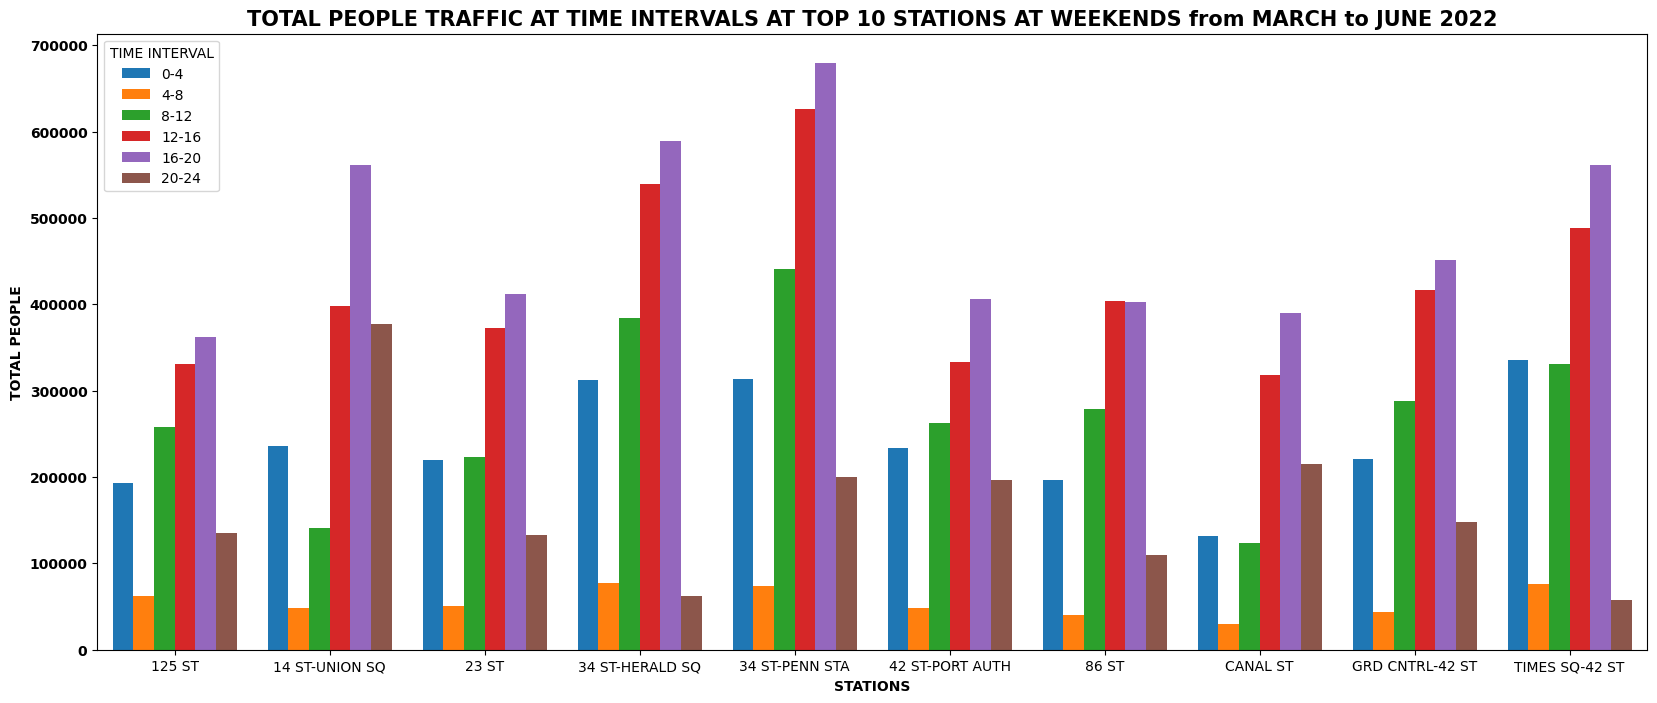

In [62]:
hue_order=['0-4','4-8','8-12','12-16','16-20','20-24']
plt.figure(figsize=(20,8),dpi=100),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TOTAL_PEOPLE", hue="INTERVAL",hue_order=hue_order,data=df2022we_timeinterval, saturation=1)
plt.title("TOTAL PEOPLE TRAFFIC AT TIME INTERVALS AT TOP 10 STATIONS AT WEEKENDS from MARCH to JUNE 2022", weight="bold", fontsize=15)
plt.xlabel("STATIONS",weight="bold")
plt.xticks(rotation=0)
plt.ylabel("TOTAL PEOPLE",weight= "bold")
plt.yticks(weight="bold")
plt.legend(title="TIME INTERVAL")
plt.show()

In [ ]:
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    dff = data.copy()
    for xi in np.unique(dff[x].values):
        group = data[dff[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    dff["order"] = order
    u, dff["ind"] = np.unique(dff[x].values, return_inverse=True)
    step = width/len(np.unique(dff[groupby].values))
    for xi,grp in dff.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

fig, ax = plt.subplots() 
sortedgroupedbar(ax, x="STATION", y="TOTAL_PEOPLE", groupby="INTERVAL", data=df2022we_timeinterval)
plt.xticks(rotation=45)
plt.yticks(weight="bold")
plt.xlabel("STATIONS",weight="bold")
plt.ylabel("TOTAL PEOPLE",weight= "bold")
plt.title("TOTAL PEOPLE TRAFFIC AT TIME INTERVALS AT TOP 10 STATIONS AT WEEKENDS from MARCH to JUNE 2022", weight="bold", fontsize=15)
plt.show()

In [ ]:
hue_order=['0-4','4-8','8-12','12-16','16-20','20-24']
plt.figure(figsize=(20,8),dpi=100),
plt.style.use('default')
#sns.catplot(x="STATION", y="TOTAL_PEOPLE", hue="INTERVAL", data=df2022we_timeinterval, hue_order=hue_order, kind="bar")
ax = sns.barplot(x="STATION", y="TOTAL_PEOPLE", hue="INTERVAL",hue_order=hue_order,data=df2022we_timeinterval, saturation=1)
plt.title("TOTAL PEOPLE TRAFFIC AT TIME INTERVALS AT TOP 10 STATIONS AT WEEKENDS from MARCH to JUNE 2022", weight="bold", fontsize=15)
plt.xlabel("STATIONS",weight="bold")
plt.xticks(rotation=0)
plt.ylabel("TOTAL PEOPLE",weight= "bold")
plt.yticks(weight="bold")
plt.legend(title="TIME INTERVAL")
plt.show()

In [ ]:
station_for_map_we=["34 Street Penn Station, New York","Grand Central - 42 St, New York","34 St - Herald Sq, New York",
                    "86th St 300-398 East 86th St, New York","23rd Street, New York","14 St - Union Sq, New York",
                    "Times Sq - 42 St, New York","Port Authorities West 42nd Street, New York",
                    "Canal st,New York",
                    "125 Street Station, New York"]

In [ ]:
lat=[]
lon=[]
for i in station_for_map_we:
    g=nom.geocode(i)
    if g is None:
        print('{} could not be geocoded'.format(i))
    else:
        lat.append(g.latitude)
        lon.append(g.longitude)
cities = {
        'stat': station_for_map_we,
        'lon': lon,
        'lat': lat
        }
locations_we= pd.DataFrame(cities, columns = ['stat', 'lon', 'lat'])

In [ ]:
locations_we

In [ ]:
locations_we.iloc[0, locations_we.columns.get_loc('lon')] = -73.99333604054702
locations_we.iloc[0, locations_we.columns.get_loc('lat')] = 40.75254353595325
locations_we.iloc[1, locations_we.columns.get_loc('lon')] = -73.97746544469129
locations_we.iloc[1, locations_we.columns.get_loc('lat')] = 40.75261507396132
locations_we.iloc[2, locations_we.columns.get_loc('lon')] = -73.98818064653828
locations_we.iloc[2, locations_we.columns.get_loc('lat')] = 40.750265690241726
locations_we.iloc[3, locations_we.columns.get_loc('lon')] =  -73.95154834469045
locations_we.iloc[3, locations_we.columns.get_loc('lat')] = 40.777908015884734
locations_we.iloc[4, locations_we.columns.get_loc('lon')] = -73.99311781770321
locations_we.iloc[4, locations_we.columns.get_loc('lat')] = 40.74310130950693
locations_we.iloc[5, locations_we.columns.get_loc('lon')] = -73.9903127735272
locations_we.iloc[5, locations_we.columns.get_loc('lat')] = 40.734707802392926
locations_we.iloc[6, locations_we.columns.get_loc('lon')] = -73.9870824600322
locations_we.iloc[6, locations_we.columns.get_loc('lat')] = 40.75601549355214
locations_we.iloc[7, locations_we.columns.get_loc('lon')] =  -73.99045146372595
locations_we.iloc[7, locations_we.columns.get_loc('lat')] = 40.757022483417735
locations_we.iloc[8, locations_we.columns.get_loc('lon')] =  -74.00178462943059
locations_we.iloc[8, locations_we.columns.get_loc('lat')] = 40.71953273722183
locations_we.iloc[9, locations_we.columns.get_loc('lon')] =  -73.94550343119525
locations_we.iloc[9, locations_we.columns.get_loc('lat')] = 40.80793375217029

In [ ]:
st_map_we=folium.Map(location=[40.730610,-73.935242], tiles="OpenStreetMap", zoom_start=12)
#location bilgisi new york için enlem ve boylam bilgisidir.
for i in range(0,len(locations_we)):
   folium.Marker(
      location=[locations_we.iloc[i]['lat'], locations_we.iloc[i]['lon']],
      popup=locations_we.iloc[i]['stat'],
   ).add_to(st_map_we)

st_map_we

In [ ]:
st_map_we.save(r"C:/Users/Saygin/Desktop/İSTDATASCİENCE/proje_1/maps/index.html")


In [ ]:
html_string = st_map_we.get_root().render()

In [ ]:
html_string